In [164]:
# LIBRARIES


import numpy as np                                                                   # for matrix operations

import pandas as pd                                                                  # for dataset loading, etc.

import unicodedata                                                                   # for removing intonations

import re                                                                            # for removing URLs, user mentions and hashtags

import nltk                                                                          # for tokenization and stopword removal
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
nltk.download('stopwords')
tokenizer = TweetTokenizer(reduce_len=True)

custom_stopwords = set([
    "και", "το", "να", "ο", "του", "η", "για", "την", "με", "θα", "δεν", "που", "τον", "της", "ειναι", "τα", "απο", "νδ", "εκλογες", "στο", "συριζα",
    "τσιπρας", "μητσοτακης", "σε", "τσιπρα", "τους", "στην", "οτι", "οι", "μητσοτακη", "κ", "τη", "στον", "μας", "τις", "κκε", "των", "τι", "εχει",
    "στη", "σκαι", "αλλα", "αν", "μια", "γιατι", "πασοκ", "κιναλ", "στις", "αυτο", "μου", "στα", "σας", "ηταν", "νεα", "τωρα", "ενα", "σου", "μονο",
    "οχι", "πως", "συνεντευξη", "μην", "μετα", "ελλαδα", "κανει", "γεννηματα", "χρονια", "μερα", "οταν", "λεει", "κι", "δημοκρατια", "ολα", "ουτε",
    "κυβερνηση", "αλεξης", "ρε", "εχουν", "οπως", "σημερα", "χωρα", "κυριακος", "πολυ", "δε", "μεσω", "ολοι", "πολιτικη", "φωφη",
     "μπορει", "αυτα", "εγω", "ως", "πιο", "πρεπει", "αυτη", "ειπε", "ειχε", "στους", "α", "εδω", "ekloges", "κομμα", "πει",
    "βιντεο", "ομως", "κατα", "καλα", "αλεξη", "εισαι", "ακομα", "αυτοδυναμια", "ελληνες", "χρηστη", "ιουλιου", "βαρουφακης", "εχω",
    "παει", "πριν", "ομιλια", "τοσο", "καθε", "σαν", "χωρις", "ποτε", "βουλη", "μαζι", "ν", "βελοπουλος", "εκανε", "ετσι", "μακεδονια", 
     "μεχρι", "επειδη", "ποιος", "ειμαι", "ενας", "κυριακη", "ναι", "κατι", "προγραμμα", "δ", "διαφορα", "υπαρχει", "μεσα", "εχουμε",
    "γινει", "εσυ", "αυριο", "ειμαστε", "κυριακο", "κανεις", "δυο", "μη", "αλλο", "απ", "ας", "video", "μεγαλη",
    "προεκλογικη", "εκει", "θελει", "αυτος", "τελος", "κουλης", "επομενη", "λαος", "ψηφος", "συμμαχια", "παρει",
    "λαο", "εχεις", "καμια", "βγει", "εμεις", "παιδια", "αυτοι", "εσεις", "μνημονιο", "ε", "κανουν", "επι", "προς", "ματι",
    "νεο", "τοτε", "θεσσαλονικη", "ολους", "αληθεια", "κουλη", "κοσιωνη", "ποσο", "λες", "παλι", "debate", "αλ", "απλα", "βουλευτης", "πρωθυπουργος", 
     "ενω", "αλλη", "κυρ", "αυτους", "δεξια", "κυριακου", "σχεδιο", "ερχεται", "σ", "λιγο",
     "αλλαγης", "θεμα", "λενε", "ερτ", "ισχυρη", "δηλαδη", "παμε", "πισω", "πολιτες", "καραμανλη", "καραμανλης", "μπροστα", 
    "δημοσκοπηση", "αφου", "τιποτα", "ζωη", "ωρα", "φορα", "κινημα", "αριστερα", "τελικα", "συμφωνια", "παντα", "εγινε", "μνημονια",
    "συγκεντρωση", "εχετε", "υποψηφιος", "ιδιο", "ξανα", "ντιμπειτ", "τελευταια", "εκτος", "ψηφισει", "καλο", "αναπτυξη", "ειστε", "ευρω", "ψηφισουν",
    "θελουν", "παντως", "απεναντι", "οσο", "tsipras", "ιδια", "ελληνικο", "γραμμη", "πανω", "ψηφο" "γ", "κανενα",
    "εντολη", "διαβαστε", "οσοι", "κουτσουμπας", "δις", "κομματα", "ψηφισω", "δωσει", "τ", "βουλευτες", "ελληνων", "γι", "ελληνικη", "ψεματα", "π",
    "ακομη", "καλη", "οποιος", "θεση", "λεω", "μ", "εναν"])

def greek_stopwords(path):
    file = open(path, "r", encoding="utf-8")
    stopwords = set()
    for word in file:
        stopwords.add(word.replace("\n",""))

    return stopwords

custom_stopwords = greek_stopwords("Stopwords-Lowercase.txt")


import spacy                                                                         # for lemmatization
spacy_model = spacy.load("el_core_news_lg")

from greek_stemmer import stemmer                                                    # for stemming

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer         # for feature extraction
            
import hashlib                                                                       # for political party encoding

from sklearn.linear_model import LogisticRegression                                  # for model training

from sklearn.model_selection import train_test_split                                 # for producing training test subsets

from sklearn.metrics import precision_score, recall_score, f1_score                  # for measuring the model's performance

import matplotlib.pyplot as plt                                                      # for plotting the learning curves

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay                 # for calculating the confusion matrix

from sklearn.metrics import roc_curve                                                # for ROC curve calculation
from sklearn.preprocessing import label_binarize
from itertools import cycle



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Timos\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [165]:
# HYPERPARAMETERS

# Feature extraction
method = 'bow'                              # 'tf-idf', 'bow' 
max_features = 1000
min_df = 0.0
max_df = 1.0

# Logistic regression model training
optimization_method = 'newton-cg'                # 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'
regularization = 'l2'                            #  'l1', 'l2', 'elasticnet', 'none'
C = 0.05                                          #  C > 0.0
maximum_iterations = 5000

# Data-cleaning
data_cleaning = {
    "urls"                 : True,
    
    "user-mentions"        : True,
    
    "hashtags"             : True,
    "symbols-only"         : False,            # if symbols-only = True , then remove hashtag symbols ONLY, e.g.  #foo -> foo
    
    "lowercase"            : True,
    
    "stopwords"            : True,
    "custom"               : True,            # if custom = True, then remove any stopwords belonging to the custom 'stopword' set
    
    "intonations"          : True,
    
    "special-characters"   : True,
    
    "lemmatization"        : True,
    
    "stemming"             : False             # if lemmatization ^ stemming = True , then do lemmatization ONLY
}   

In [166]:
# OTHER PARAMETERS

# Training-subset creation
minimum_percentage = 0.1
maximum_percentage = 0.95
total_subsets = 10


# Validation performance measurement
average_type = 'weighted'

In [167]:
# DATASET URLS

train_set_url = "kaggle/input/ys19-2023-assignment-1/train_set.csv"
validation_set_url = "kaggle/input/ys19-2023-assignment-1/valid_set.csv"
test_set_url = "kaggle/input/ys19-2023-assignment-1/test_set.csv"

In [168]:
# DATASET LOADING

def load_dataset(dataset_url):

    dataframe = pd.read_csv(dataset_url)

    return dataframe

In [169]:
# DATA PRE-PROCESSING

# Tokenization
def tokenize(tweet,tokenizer = tokenizer):
    tokens = tokenizer.tokenize(tweet)
    return tokens

# URL removal 
def remove_URLs(tokens):

    url_regex = r'(http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+)|(www\.[^ \s]+)'
    compiled_url_regex = re.compile(url_regex)

    final_tokens = []
    
    for token in tokens:
        if not compiled_url_regex.match(token):
            final_tokens.append(token)

    return final_tokens

# User mention removal 
def remove_user_mentions(tokens):

    user_mention_regex = r'@\w+'
    compiled_user_mention_regex = re.compile(user_mention_regex)

    final_tokens = []
    
    for token in tokens:
        if not compiled_user_mention_regex.match(token):
            final_tokens.append(token)

    return final_tokens

# Hashtag removal 
def remove_hashtags(tokens, symbols_only):

    final_tokens = []

    if symbols_only:
        for token in tokens:
            no_hashtag_token = token.replace('#', '')
            final_tokens.append(no_hashtag_token)
    
    else:
        hashtag_regex = re.compile(r'#\S+')
        for token in tokens:
            if not hashtag_regex.match(token):
                final_tokens.append(token)
    
    return final_tokens

# Special character removal
def remove_special_characters(tokens):

    final_tokens = []
    
    for token in tokens:
        
        final_token = ''
        
        for character in token:
            
            if character.isalpha():
                final_token += character
        
        final_tokens.append(final_token)
        
    return final_tokens

# Intonation removal
def remove_intonations(tokens):

    final_tokens = []


    for token in tokens:

        # Break down the token into normal characters and their respective intonations
        transformed_token = unicodedata.normalize('NFD', token)

        final_token = ''

        for character in transformed_token:
            # If the character is not an intonation, add it to the final token
            if not unicodedata.combining(character):
                final_token += character

        final_tokens.append(final_token)

    return final_tokens


# Lowercase conversion
def convert_to_lowercase(tokens):

    final_tokens = []

    for token in tokens:
        # Convert each token to lowercase
        lower_token = token.lower()
        final_tokens.append(lower_token)

    return final_tokens

# Stop-word removal
def remove_stopwords(tokens,custom,custom_stopwords=custom_stopwords):
    
    final_tokens = []

    if custom :
        for token in tokens:
            # If the token is not a stop word, store it
            if token not in custom_stopwords:
                final_tokens.append(token)
        
    else :
        # Get Greek stop-words
        nltk_stopwords = set(stopwords.words('greek'))
        
        for token in tokens:
            # If the token is not a stop word, store it
            if token not in nltk_stopwords:
                final_tokens.append(token)
    
    return final_tokens

# Space removal
def remove_spaces(tokens):
    
    final_tokens = []

    for token in tokens:

        final_token = token.replace(" ","")
        final_tokens.append(final_token)

    return final_tokens


# Empty token removal
def remove_empty_tokens(tokens):

    final_tokens = []

    for token in tokens:

        # If the token is not empty, store it
        if token:
            final_tokens.append(token)

    return final_tokens


# Lemmatization
def lemmatize_tokens(tokens,model=spacy_model):


    # All lemmatized tokens will be stored here
    final_tokens = []

    # Create a spaCy Doc object
    doc = model(" ".join(tokens), disable=["tagger", "parser", "ner"])

    for token in doc:
        # Perform lemmatization on each token
        final_tokens.append(token.lemma_)

    return final_tokens


# Stemming
def stem_tokens(tokens):

    # All stemmed tokens will be stored here
    final_tokens = []

    for token in tokens:
        # Perform stemming on each token
        final_token = stemmer.stem_word(token, 'VB')
        final_tokens.append(final_token)

    return final_tokens


# Tweet cleaning - cleans an individual tweet
def clean_tweet(tweet,data_cleaning = data_cleaning):

    tokens = tokenize(tweet)
    
    if data_cleaning.get("urls", False):
        tokens = remove_URLs(tokens)
    
    if data_cleaning.get("user-mentions", False):
        tokens = remove_user_mentions(tokens)
        
    if data_cleaning.get("hashtags", False):
        symbols_only = data_cleaning.get("symbols-only", False)
        tokens = remove_hashtags(tokens,symbols_only)
    
    if data_cleaning.get("special-characters", False):
        tokens = remove_special_characters(tokens)
    
    if data_cleaning.get("intonations", False):
        tokens = remove_intonations(tokens)
    
    if data_cleaning.get("lowercase", False):
        tokens = convert_to_lowercase(tokens)
    
    if data_cleaning.get("stopwords", False):
        custom = data_cleaning.get("custom", False)
        tokens = remove_stopwords(tokens, custom)
    
    if data_cleaning.get("lemmatization", False):
        tokens = lemmatize_tokens(tokens)
        
    elif data_cleaning.get("stemming", False):
        tokens = stem_tokens(tokens)
        
    tokens = remove_spaces(tokens)
    
    tokens = remove_empty_tokens(tokens)
    
    return tokens

# Dataset cleaning - cleans a whole dataset, e.g. training, validation or test set
def clean_dataset(dataset):

    # All tokenized tweets will be stored here
    cleaned_tokenized_tweets = []

    # Iterate through each row of the dataset
    for index, row in dataset.iterrows():
        # Get the tweet of each row
        tweet = row['Text']
        # Tokenize the tweet and clean it
        cleaned_tweet = clean_tweet(tweet)
        # Store the cleaned, tokenized tweet
        cleaned_tokenized_tweets.append(cleaned_tweet)

    return cleaned_tokenized_tweets

# Political party encoding
def encode_political_parties(political_parties):

    # All the numeric values of the political parties will be stored here
    numeric_values = []

    # The maximum value the SHA-256 hash function can produce
    maximum_hash_value = 2**256 - 1


    for party in political_parties:

        # Convert each party into a string before hashing it, to make sure encode() function will work
        party_as_string = str(party)
        # Hash the party using SHA-256
        original_hash_value = int(hashlib.sha256(party_as_string.encode()).hexdigest(), 16)

        normalized_hash_value = original_hash_value / maximum_hash_value
        numeric_values.append(normalized_hash_value)

    return numeric_values


# Sentiment encoding
def encode_sentiments(sentiments, to_numbers = True):

    if to_numbers:
        sentiment_values = {'POSITIVE': 1, 'NEUTRAL': 0, 'NEGATIVE': -1}
    else:
        sentiment_values = {1 : 'POSITIVE' , 0 : 'NEUTRAL', -1 : 'NEGATIVE'}
        
    new_sentiments = []

    for sentiment in sentiments:
        new_value = sentiment_values.get(sentiment, None)
        new_sentiments.append(new_value)

    return new_sentiments




# Feature extraction
def extract_features(cleaned_tokenized_tweets,political_parties, vectorizer=None,method=method, max_features=max_features,
                     min_df=min_df,max_df=max_df):

    # Convert all tokenized tweets into normal tweets, aka strings
    cleaned_tweets = []
    for tokenized_tweet in cleaned_tokenized_tweets:
        # Merge the tokens of each tweet into a single string, using a space delimiter
        tweet = ' '.join(tokenized_tweet)
        cleaned_tweets.append(tweet)
    
    # If the vectorizer doesn't exist
    if vectorizer is None:
        # Then, if the feature extraction method chosen is TF-IDF
        if method == 'tf-idf':
            # Initialize the TF-IDF vectorizer
            vectorizer = TfidfVectorizer(max_features=max_features,min_df=min_df,max_df=max_df)
        # Else, if the feature extraction method chosen is Bag of Words
        elif method == 'bow' :
            # Otherwise, initialize the BoW vectorizer
            vectorizer = CountVectorizer(max_features=max_features, min_df=min_df, max_df=max_df)
        else :
            raise ValueError("Invalid method specified. Please choose either 'tf-idf' or 'bow'.")
        # construct the feature space, and calculate the feature values for the training set
        sparse_matrix = vectorizer.fit_transform(cleaned_tweets)
        print(list(vectorizer.get_feature_names_out())[:21])
        
    else:
        # Otherwise, calculate the feature values of the dataset (validation or test set) using the feature space learned from the training set
        sparse_matrix = vectorizer.transform(cleaned_tweets)
        
    
    
    
    # Convert the SPARSE matrix into a DENSE dataframe
    dense_matrix = pd.DataFrame(sparse_matrix.toarray())
        
    # Convert the type of each column name to a string, so they are compatible with the 'Party' column
    dense_matrix.columns = dense_matrix.columns.astype(str)
    
    # Encode the political parties' values into numbers in the range of [0,1]
    encoded_parties = encode_political_parties(political_parties)
    
    # The features are the 2D array's values PLUS the parties in a numeric form
    feature_matrix = dense_matrix.assign(Party=encoded_parties)
    
    return (feature_matrix, vectorizer)


# Dataset preprocessing - returns the features and labels (if they exist) in their final, numeric form
def preprocess_dataset(dataset, vectorizer = None):
    
    # Get the clean form of the tweets
    cleaned_tokenized_tweets = clean_dataset(dataset)
    

    # Get the political parties from the dataset
    political_parties = dataset['Party']

    
    # Extract dataset's features, using the clean tweets and the political parties
    (features, train_set_vectorizer) = extract_features(cleaned_tokenized_tweets,political_parties,vectorizer)

    # If the sentiments exist (so the dataset is either the training or the validation set), convert them in numbers too
    labels = None
    if 'Sentiment' in dataset.columns:
        labels = encode_sentiments(dataset['Sentiment'])


    return (features,labels, train_set_vectorizer)

In [170]:
# MODEL TRAINING


def logistic_regression_training(features, labels, optimization_method=optimization_method, regularization=regularization, maximum_iterations=maximum_iterations, C=C):


    # Create a logistic regression model
    logistic_regression_model = LogisticRegression(solver=optimization_method, penalty=regularization, max_iter=maximum_iterations, multi_class='multinomial', C=C)
 

    # Train the logistic regression model, based on the features and the labels provided
    logistic_regression_model.fit(features, labels)

    # Return the trained model
    return logistic_regression_model

In [171]:
# LEARNING CURVES


def calculate_learning_curve_values(train_features, train_labels, validation_features, validation_labels,minimum_percentage=minimum_percentage,
                                    maximum_percentage=maximum_percentage, total_subsets=total_subsets, average_type=average_type):
    
    training_scores = []
    validation_scores = []

    for percentage in np.linspace(minimum_percentage, maximum_percentage, total_subsets):

        # Incrementally pick a specific percentage of the TRAIN set each time, to train the model
        (subset_features, _, subset_labels, _) = train_test_split(train_features, train_labels, train_size=percentage)

        # Create and train a logistic regression model for the current training subset
        subset_trained_model = logistic_regression_training(subset_features, subset_labels)

        # Calculate the predictions and the F1 score of the current sub-model on the TRAINING subset
        training_predictions = subset_trained_model.predict(subset_features)
        train_f1_score = recall_score(subset_labels, training_predictions, average=average_type)
        training_scores.append(train_f1_score)

        # Calculate the predictions and the F1 score of the current sub-model on the VALIDATION set
        validation_predictions = subset_trained_model.predict(validation_features)
        validation_f1_score = recall_score(validation_labels, validation_predictions, average=average_type)
        validation_scores.append(validation_f1_score)

    return (training_scores, validation_scores)


def plot_learning_curves(training_scores, cross_validation_scores, minimum_percentage=minimum_percentage, maximum_percentage=maximum_percentage,
                         total_subsets=total_subsets):


    # Generate the percentages, of the dataset used each time, for the x-axis
    percentages = np.linspace(minimum_percentage, maximum_percentage, total_subsets) * 100
    
    # Plot the training scores
    plt.plot(percentages, training_scores, label='Training Score', marker='o')

    # Plot the cross-validation scores
    plt.plot(percentages, cross_validation_scores, label='Cross-Validation Score', marker='x')

    # Add labels and title
    plt.xlabel('Percentage of Data Used for Training')
    plt.ylabel('Score')
    plt.title('Learning Curves')

    # Add a grid for easier readability
    plt.grid(True)

    # Add a legend to explain which curve is which
    plt.legend()

    # Save the plot
    filename = "kaggle/working/learning_curve.png"
    
    plt.savefig(filename)

    # Plot the two curves
    plt.show()

In [172]:
# MODEL'S PERFORMANCE MEASUREMENT

def measure_performance(true_labels, predictions, average_type=average_type):

    # Calculate precision
    precision = precision_score(true_labels, predictions, average=average_type)

    # Calculate recall
    recall = recall_score(true_labels, predictions, average=average_type)

    # Calculate  F1-score
    f1 = f1_score(true_labels, predictions, average=average_type)

    return (precision, recall, f1)

In [173]:
# CONFUSION MATRIX CALCULATION AND PLOTTING

def calculate_confusion_matrix(true_labels, predictions):
    
    confusion_array = confusion_matrix(true_labels, predictions)
    
    return confusion_array

def plot_confusion_matrix(confusion_array):
    
    array_to_display = ConfusionMatrixDisplay(confusion_matrix=confusion_array, display_labels=['POSITIVE','NEUTRAL','NEGATIVE'])
    array_to_display.plot()
    
    filename = "kaggle/working/confusion_array.png"
    array_to_display.figure_.savefig(filename) 
    
    return
    
    

In [174]:
# ROC CURVE CALCULATION AND PLOTTING

def plot_roc_curves(true_labels, predicted_probabilities, class_labels):
    
    # Binarize the true labels for one-vs-rest comparison
    binarized_true_labels = label_binarize(true_labels, classes=class_labels)
    
    # Compute ROC curve for each class
    
    # Dictionary to store False Positive Rate
    fpr = dict() 
    # Dictionary to store True Positive Rate
    tpr = dict()  
    
    # Determine the number of classes by examining the shape of the binarized labels
    n_classes = binarized_true_labels.shape[1]
    
    # Calculate FPR and TPR for each class
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(binarized_true_labels[:, i], predicted_probabilities[:, i])
    
    
    plt.figure(figsize=(10, 8))
    colors = cycle(['blue', 'red', 'green'])
    class_description = {-1: "NEGATIVES", 0: "NEUTRALS", 1: "POSITIVES"}
    
    # For each class, plot the ROC curve
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve for {0}'.format(class_description[class_labels[i]]))
    
    # Plot the diagonal line
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    
    # Set the limits of the x-axis
    plt.xlim([0.0, 1.0])
    
    # Set the limits of the y-axis
    plt.ylim([0.0, 1.0])
    
    # Add labels and title
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Multi-class ROC Curves')
    
    # Add legend to the low right corner
    plt.legend(loc="lower right")
    
    # Save the plot
    filename = "kaggle/working/ROC_curves.png"
    
    plt.savefig(filename)
    
    # Display the plot
    plt.show()

In [175]:
# SUBMISSION CREATION


def create_submission(test_set, test_set_predictions):
    
    # Transform the predictions from numbers (1,0,-1) to strings ('POSITIVE','NEUTRAL','NEGATIVE')
    sentiments = encode_sentiments(test_set_predictions, to_numbers=False)
    
    # Get the IDs from the test set
    IDs = test_set['New_ID']
    
    # Create a new DataFrame, consisting only of the IDs and their respective sentiments
    IDs_and_predictions = pd.DataFrame({'Id': IDs, 'Predicted': sentiments})
    
    filename = "kaggle/working/submission.csv"
    
    # Save the DataFrame to a CSV file in the specified directory
    IDs_and_predictions.to_csv(filename, index=False)
    
    return

In [176]:
# MODEL SAVING

def save_model(dictionary):
    
    def print_and_save(dictionary):
       
        for (key, value) in dictionary.items():
            
            if isinstance(value, dict):
                print_and_save(value)
            else:
                line = f"{key}: {value}"
                print(line)
                file.write(line + '\n')

    filename = "kaggle/working/model.txt"
    
    with open(filename, 'w') as file:
        print_and_save(dictionary)


In [177]:
# MODEL TRAINING

# Load the training set
train_set = load_dataset(train_set_url)

# Preprocess the training set
(train_features, train_labels, train_set_vectorizer) = preprocess_dataset(train_set)


# Train the model, using logistic regression
trained_model = logistic_regression_training(train_features,train_labels)

['alpha', 'athens', 'been', 'debate', 'die', 'documento', 'exofitsio', 'fake', 'fm', 'gr', 'has', 'live', 'new', 'news', 'nicemagazine', 'novartis', 'on', 'post', 'published', 'the', 'times']


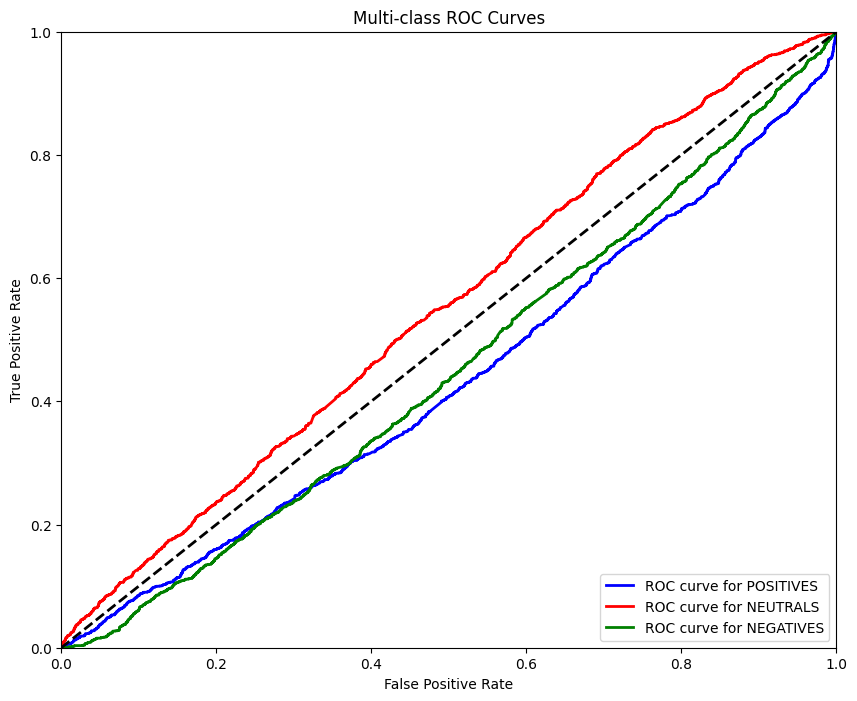

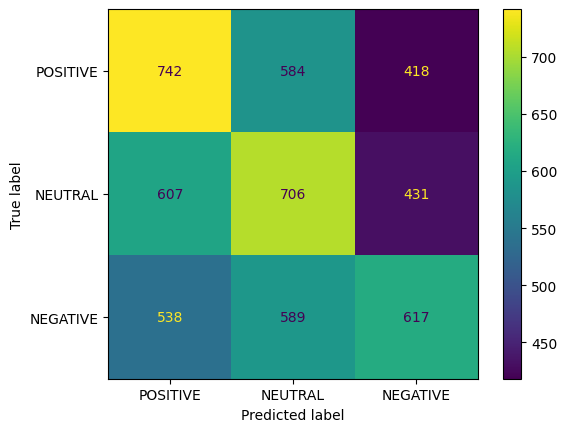

In [178]:
# MODEL EVALUATION

# Load the validation set
validation_set = load_dataset(validation_set_url)

# Preprocess the validation set
(validation_features,validation_labels,_) = preprocess_dataset(validation_set,train_set_vectorizer)

# Calculate the model's predictions on the validation set
validation_predictions = trained_model.predict(validation_features)

# Measure the model's performance on precision, recall and f1 measures, on the validation set
(precision, recall, f1) = measure_performance(validation_labels, validation_predictions)

# Calculate the model's probabilities on the validation set
validation_probabilities = trained_model.predict_proba(validation_features)

# Plot the ROC curves, using the true labels of the validation set, and the model's probabilities on it
plot_roc_curves(validation_labels, validation_probabilities, [1,0,-1])

# Calculate the confusion matrix of the model, given its predictions on the validation set
confusion_array = calculate_confusion_matrix(validation_labels, validation_predictions)

plot_confusion_matrix(confusion_array)


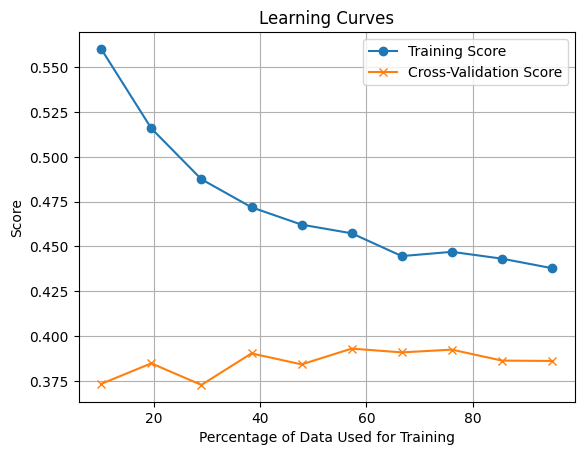

In [179]:
# LEARNING CURVE CALCULATION AND PLOTTING


# Calculate the training and cross validation scores to plot them
(training_scores, cross_validation_scores) = calculate_learning_curve_values(train_features, train_labels,validation_features,validation_labels)

# Plot the learning curves
plot_learning_curves(training_scores, cross_validation_scores)

In [180]:
# MODEL SAVER CREATION

model_saver = {
    
    # The process followed to clean the datasets
    'data_cleaning' : data_cleaning,
    
    # The method used to extract the features of the datasets
    'method' : method,
    'max_features' : max_features,
    'min_df' : min_df,
    'max_df' : max_df,
    
    # The hyperparameters used in logistic regression,
    'optimization_method' : optimization_method,
    'regularization' : regularization,
    'C' : C,
    'maximum_iterations' : maximum_iterations,
    
    # The trained model's scores on the validation set
    'precision': precision,
    'recall' : recall,
    'f1' : f1
    
}


save_model(model_saver)

urls: True
user-mentions: True
hashtags: True
symbols-only: False
lowercase: True
stopwords: True
custom: True
intonations: True
special-characters: True
lemmatization: True
stemming: False
method: bow
max_features: 1000
min_df: 0.0
max_df: 1.0
optimization_method: newton-cg
regularization: l2
C: 0.05
maximum_iterations: 5000
precision: 0.3966072141748427
recall: 0.39468654434250766
f1: 0.3942862595914687


In [181]:
# MODEL TESTING

# Load the test set
test_set = load_dataset(test_set_url)

# Preprocess the test set - no labels exist, thus test_labels are replaced with _
(test_features, _, _) = preprocess_dataset(test_set, train_set_vectorizer)

# Calculate the model's predictions on the test set
test_predictions = trained_model.predict(test_features)

# Create the submission file
create_submission(test_set,test_predictions)